In [2]:
import os
import numpy as np
from PIL import Image

def load_dataset(folder_path):
    X = []
    y = []
    #threshold=0.7
    for fname in os.listdir(folder_path):
        if fname.endswith('.png') or fname.endswith('.jpg'):
            path = os.path.join(folder_path, fname)
            img = Image.open(path).convert('L')
            img_array = np.array(img).flatten() / 255.0
            
            # Inversion correction
            #if np.mean(img_array) > threshold:
            #    img_array = 1.0 - img_array

            X.append(img_array)
            y.append(1 if 'positive' in fname.lower() else 0)

    return np.array(X), np.array(y)

# Paths
train_path = 'data - Copy/Train'
test_path = 'data - Copy/Test'

X_train, y_train = load_dataset(train_path)
X_test, y_test = load_dataset(test_path)


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Try different λ values: λ = 0.01 → C = 100, etc.
lambdas = [0.001, 0.01, 0.1, 1, 10, 100]
results = []

for lam in lambdas:
    model = LogisticRegression(penalty='l2', C=1/lam, solver='lbfgs', max_iter=500)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((lam, acc, model))

# Show results
for lam, acc, _ in results:
    print(f"Lambda: {lam} | Test Accuracy: {acc:.4f}")


Lambda: 0.001 | Test Accuracy: 0.6426
Lambda: 0.01 | Test Accuracy: 0.6474
Lambda: 0.1 | Test Accuracy: 0.6683
Lambda: 1 | Test Accuracy: 0.6619
Lambda: 10 | Test Accuracy: 0.6538
Lambda: 100 | Test Accuracy: 0.6522


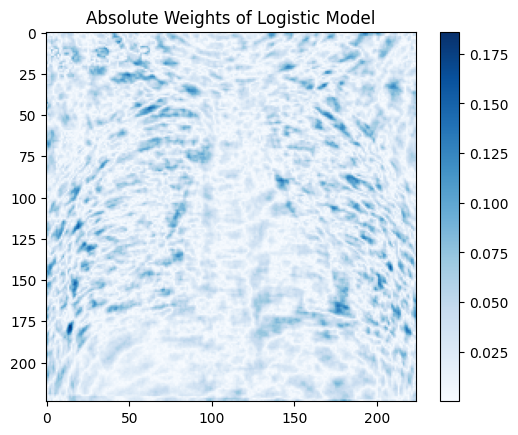

In [36]:
import matplotlib.pyplot as plt

# Pick the best performing model
best_model = max(results, key=lambda x: x[1])[2]
weights = best_model.coef_.reshape(224, 224)

plt.imshow(np.abs(weights), cmap='Blues')
plt.title('Absolute Weights of Logistic Model')
plt.colorbar()
plt.show()


In [31]:
from sklearn.metrics import accuracy_score, classification_report

# Predict labels for the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Detailed performance report
print(classification_report(y_test, y_pred, target_names=["Healthy", "Pneumonia"]))


Test Accuracy: 0.6731
              precision    recall  f1-score   support

     Healthy       0.70      0.23      0.34       234
   Pneumonia       0.67      0.94      0.78       390

    accuracy                           0.67       624
   macro avg       0.68      0.58      0.56       624
weighted avg       0.68      0.67      0.62       624


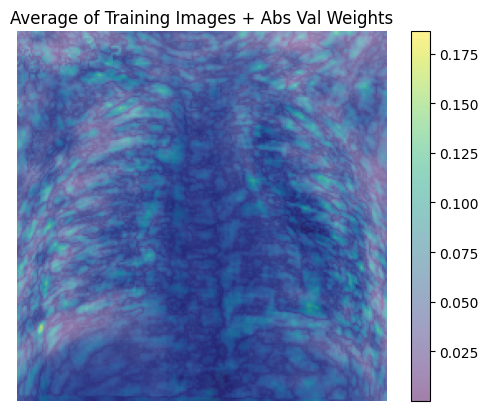

In [50]:
import matplotlib.pyplot as plt

# Reshape each image to 224×224 before stacking
X_train_images = X_train.reshape(-1, 224, 224)

# Compute pixel-wise mean image
mean_image = np.mean(X_train_images, axis=0)

# Visualize it
plt.imshow(mean_image, cmap='Blues')
plt.imshow(np.abs(weights), alpha=0.5)
plt.title("Average of Training Images + Abs Val Weights")
plt.axis('off')
plt.colorbar()
plt.show()